# DAgger: Walker2d-v4 Experiment Analysis

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

os.chdir('/home/mohsen/projects/cs285/hw1/')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [4]:
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = '150'

In [5]:
exp_path = 'tune_exps/'

In [6]:
cat_hyper_params = ['batch_size', 'n_layers', 'size', 
                    'train_batch_size', 'num_agent_train_steps_per_iter', 'n_iter']
cont_hyper_params = ['learning_rate']

## Walker2d v4 Experiment Hyper-parameter optimization analysis

In [7]:
experiments = [folder for folder in os.listdir(exp_path) if folder.startswith('q2_tune_walker2d')]

In [8]:
len(experiments)

261

In [9]:
import json

In [10]:
from tqdm import tqdm

In [23]:
df = None
for experiment in tqdm(sorted(experiments)):
    try:
        progress_df = pd.read_csv(os.path.join(exp_path, experiment, 'progress.csv'))
        if len(progress_df) >= 1:
            # print(experiment)
            progress_df['id'] = experiment
            
            params = json.load(open(os.path.join(exp_path, experiment, 'hyper-params.json'), 'r'))
            if params['eval_batch_size'] != 10000 or params['ep_len'] != 1024: 
                continue
            
            for key, value in params.items():
                if key not in ['agent_params', 'env_kwargs']:
                    progress_df[key] = value
                else:
                    for key2, value2 in params[key].items():
                        progress_df[key2] = value2

            if 'Agent_Accuracy' not in progress_df.columns:
                continue
            
            if df is None:
                df = progress_df.iloc[-1, :].copy()
            else:
                df = pd.concat([df, progress_df.iloc[-1, :]], axis=1)
        else:
            continue
    except:
        print(experiment)
        continue
df = df.T

 27%|█████████████████████████████▊                                                                                 | 70/261 [00:00<00:01, 142.13it/s]

q2_tune_walker2d_Walker2d-v4_16-09-2022_18-23-29
q2_tune_walker2d_dagger_Walker2d-v4_15-09-2022_22-04-26


 38%|██████████████████████████████████████████▏                                                                   | 100/261 [00:00<00:01, 136.87it/s]

q2_tune_walker2d_dagger_Walker2d-v4_16-09-2022_01-37-21
q2_tune_walker2d_dagger_Walker2d-v4_16-09-2022_04-13-22


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████▎            | 231/261 [00:01<00:00, 177.89it/s]

q2_tune_walker2d_dagger_Walker2d-v4_16-09-2022_13-48-57
q2_tune_walker2d_dagger_Walker2d-v4_16-09-2022_13-53-39


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 261/261 [00:01<00:00, 160.85it/s]

q2_tune_walker2d_dagger_Walker2d-v4_16-09-2022_18-22-05


In [24]:
df.shape

(221, 48)

In [25]:
df.head()

,Iteration,Eval_AverageReturn,Eval_StdReturn,Eval_MaxReturn,Eval_MinReturn,Eval_AverageEpLen,Train_AverageReturn,Train_StdReturn,Train_MaxReturn,Train_MinReturn,...,no_gpu,which_gpu,max_replay_buffer_size,save_params,seed,logdir,discrete,ac_dim,ob_dim,render_mode
19,19,376.75214,204.69475,1006.29895,1.975872,137.219178,281.72968,27.558372,318.1745,257.27246,...,False,0,1000000,False,2049,/home/mohsen/projects/cs285/hw1/cs285/scripts/...,False,6,17,None
4,4,336.7918,177.87169,921.4936,1.731609,157.859375,345.50113,174.73575,869.29614,0.754118,...,False,0,1000000,False,2402,/home/mohsen/projects/cs285/hw1/cs285/scripts/...,False,6,17,None
24,24,58.923717,87.29342,508.26544,-2.451672,43.145923,57.32363,83.3392,328.78235,-1.449671,...,False,0,1000000,False,2504,/home/mohsen/projects/cs285/hw1/cs285/scripts/...,False,6,17,None
2,2,290.9021,190.56526,711.2489,-3.355991,142.478873,516.3623,118.77469,635.13696,397.5876,...,False,0,1000000,False,3003,/home/mohsen/projects/cs285/hw1/cs285/scripts/...,False,6,17,None
2,2,343.53253,162.90677,1121.7747,2.875365,150.731343,279.96228,73.29653,416.13422,206.3685,...,False,0,1000000,False,3059,/home/mohsen/projects/cs285/hw1/cs285/scripts/...,False,6,17,None


In [26]:
df['Training Loss'].describe()

count     221.000000
unique    221.000000
top         0.076782
freq        1.000000
Name: Training Loss, dtype: float64

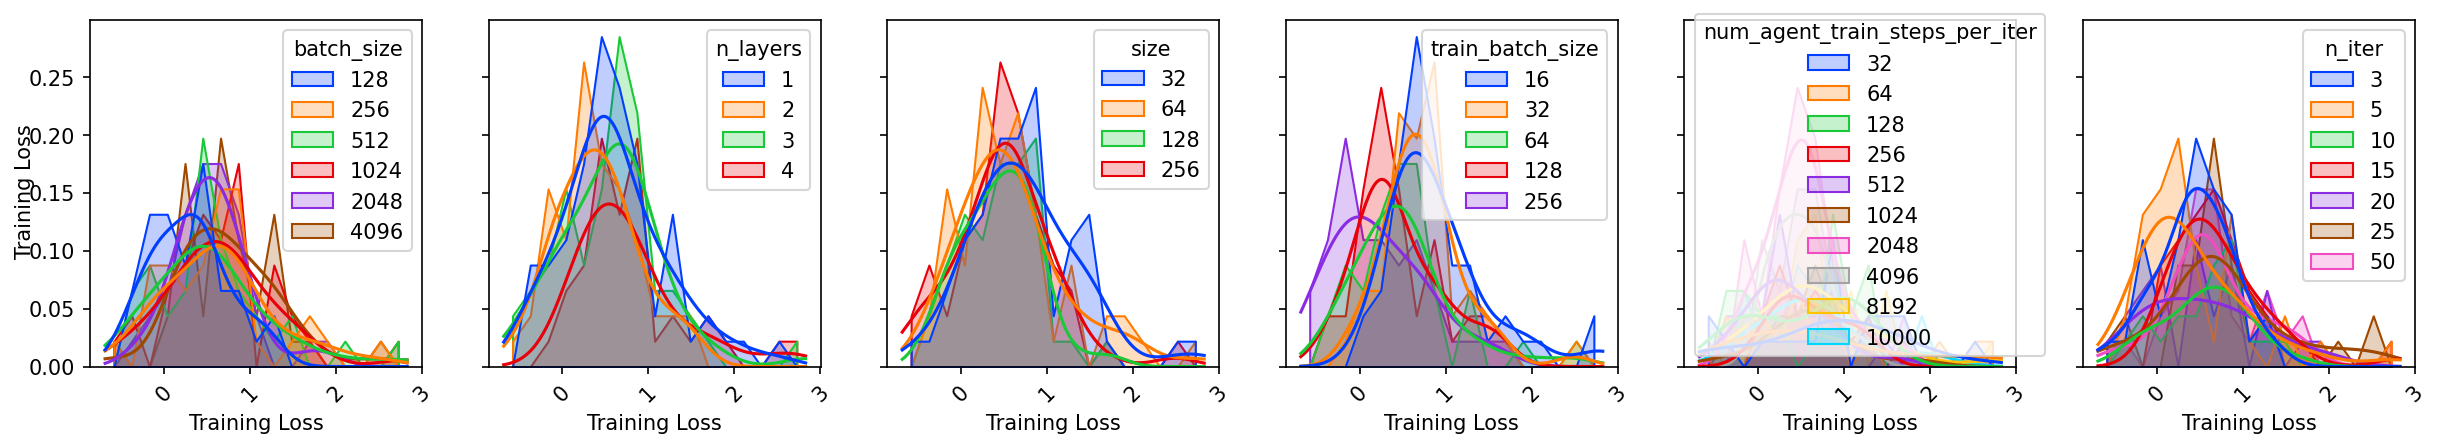

In [27]:
fig, ax = plt.subplots(1, len(cat_hyper_params), sharey=True, sharex=False, figsize=(20, 3))
# fig.text(0.5, 0.04, 'common X', ha='center')
fig.text(0.1, 0.5, 'Training Loss', va='center', rotation='vertical')
for i, param in enumerate(cat_hyper_params):
    g = sns.histplot(data=df, x='Training Loss', hue=param, ax=ax[i], fill=True,
                     palette=sns.color_palette('bright', len(df[param].unique())), kde=True, 
                     element='poly', stat='density')
    g.set_ylabel('')
    ax[i].tick_params(axis='x', rotation=45)

/tmp/ipykernel_3614295/2049649591.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.histplot(data=df, x=param, y='Training Loss', kde=True,


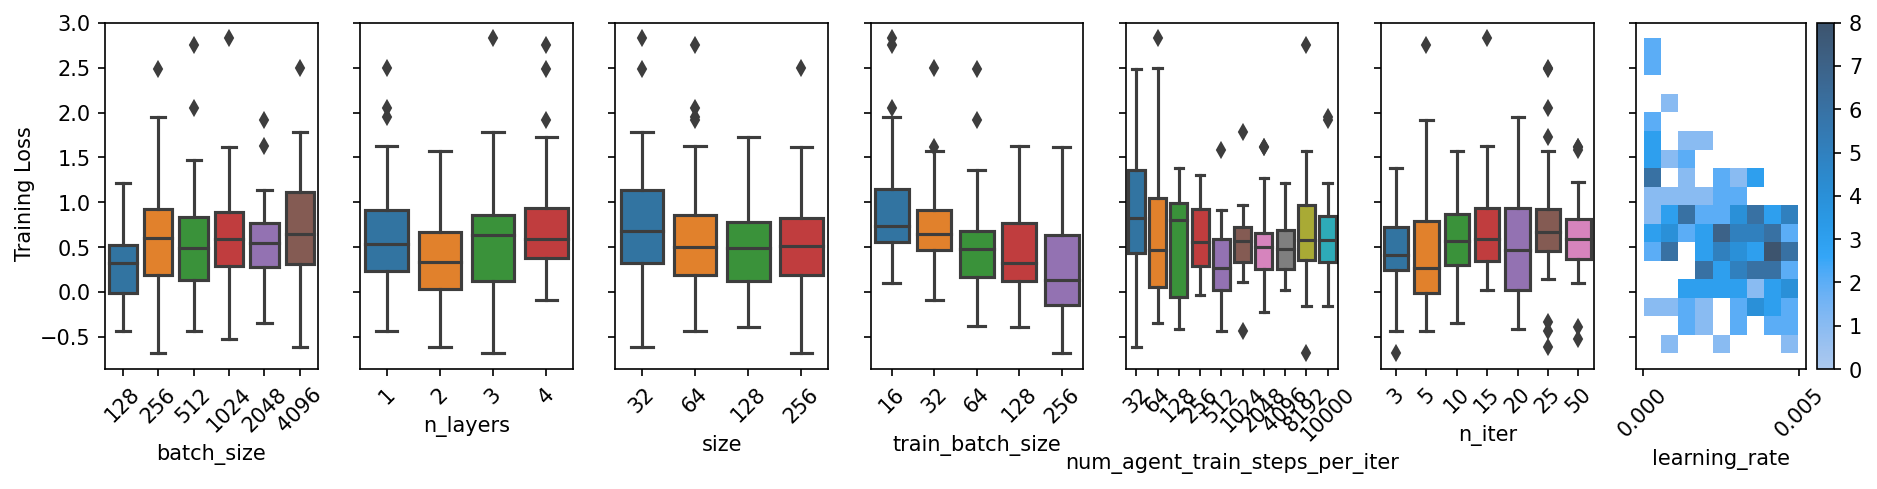

In [28]:
fig, ax = plt.subplots(1, len(cat_hyper_params) + len(cont_hyper_params), sharey=True, sharex=False, figsize=(15, 3))
# fig.text(0.5, 0.04, 'common X', ha='center')
fig.text(0.085, 0.5, 'Training Loss', va='center', rotation='vertical')
for i, param in enumerate(cat_hyper_params):
    g = sns.boxplot(data=df, x=param, y='Training Loss', ax=ax[i])
    g.set_ylabel('')
    ax[i].tick_params(axis='x', rotation=45)

offset = len(cat_hyper_params)

for i, param in enumerate(cont_hyper_params):
    # g = sns.scatterplot(data=df, x=param, y='Training Loss', ax=ax[i + offset])
    # g.set_ylabel('')
    g = sns.histplot(data=df, x=param, y='Training Loss', kde=True,
            palette=sns.color_palette("coolwarm", as_cmap=True), cbar=True,
            ax=ax[i + offset])
    ax[i + offset].tick_params(axis='x', rotation=45)

/tmp/ipykernel_3614295/2945391405.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data=df, x='learning_rate', y='Training Loss', kind="kde",
/home/mohsen/miniconda3/envs/cs285/lib/python3.9/site-packages/seaborn/distributions.py:1191: UserWarning: The following kwargs were not used by contour: 'binwidth'
  cset = contour_func(


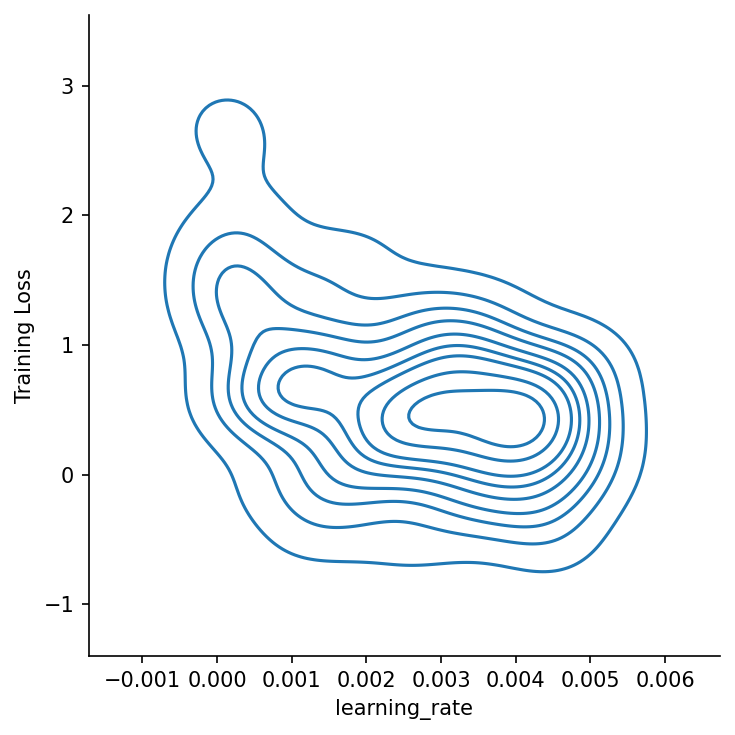

In [29]:
sns.displot(data=df, x='learning_rate', y='Training Loss', kind="kde",
            palette=sns.color_palette("coolwarm", as_cmap=True), 
            binwidth=(0.1, .1e-5), cbar=False)

In [30]:
df[df['Training Loss'] == df['Training Loss'].min()]['id']

2    q2_tune_walker2d_dagger_Walker2d-v4_16-09-2022...
Name: id, dtype: object

In [31]:
plot_df = df[cat_hyper_params]
target_df = df['Training Loss']

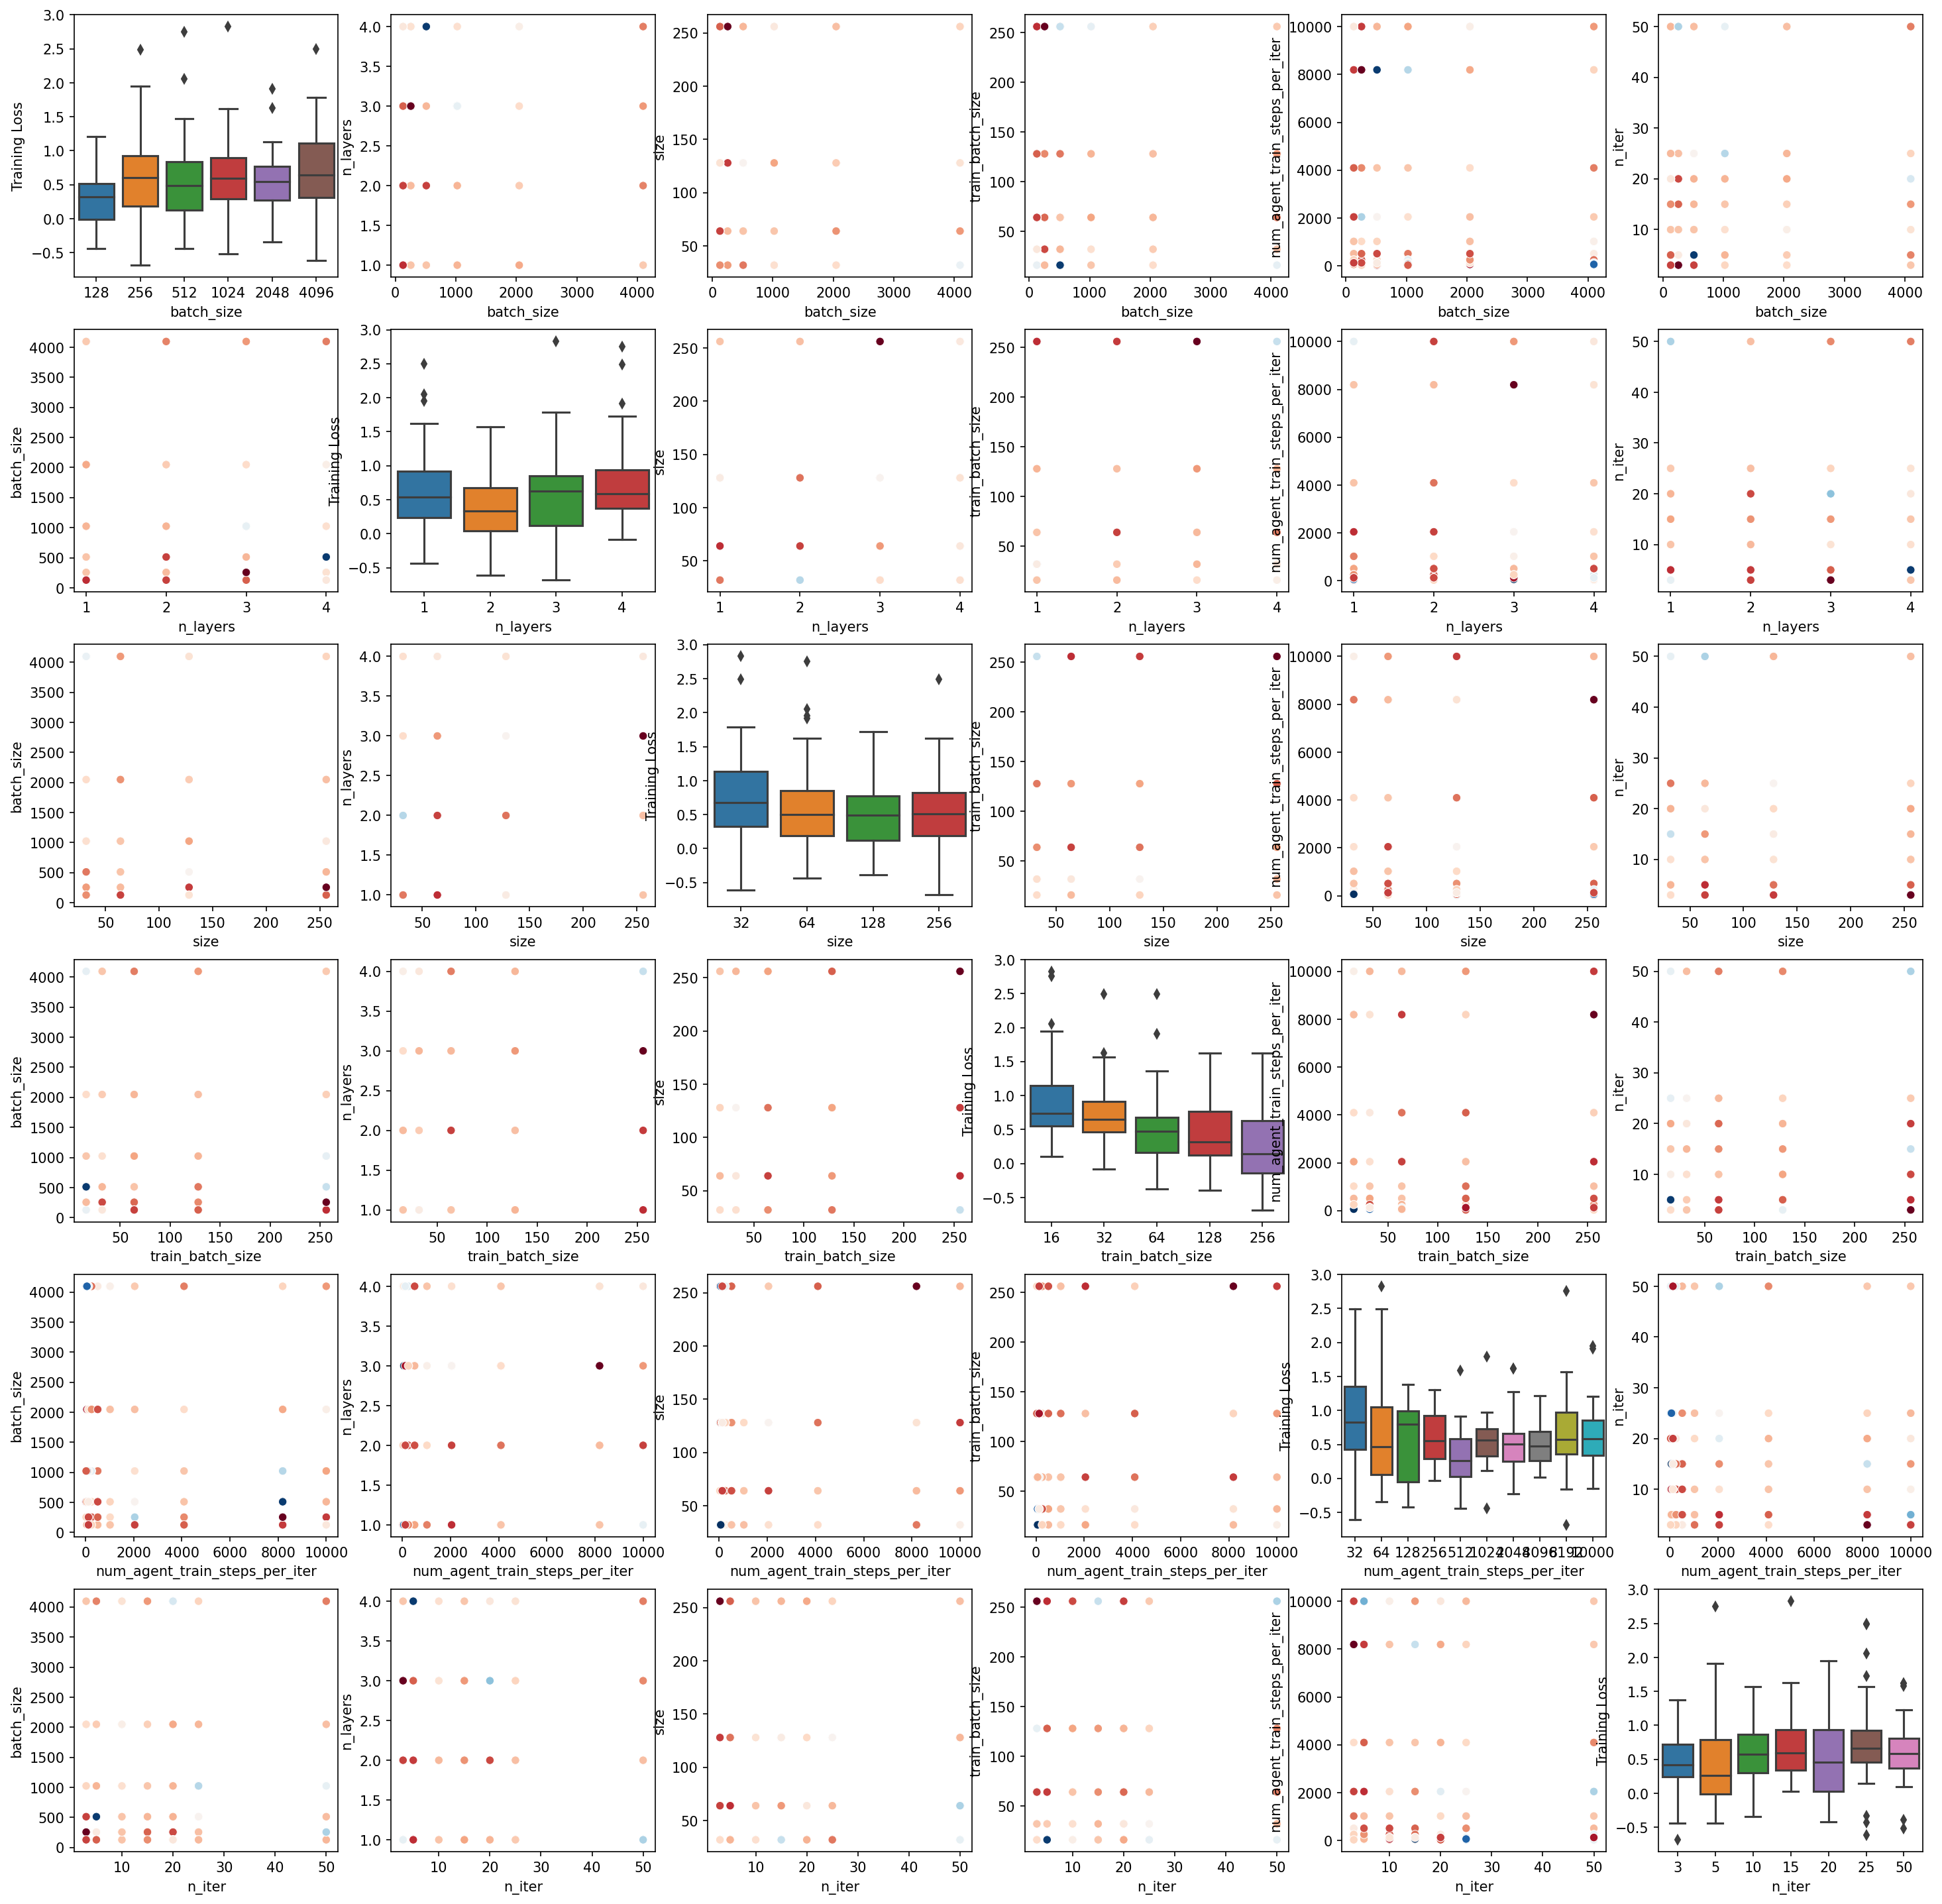

In [32]:
num_features = len(plot_df.columns)
fig,ax = plt.subplots(num_features, num_features, figsize=(24, 24), squeeze=True)
for idx, i in enumerate(plot_df.columns):
    for jdx, j in enumerate(plot_df.columns):
        if i == j:    # diagonal
            # sns.scatterplot(x=plot_df[i], y=plot_df[j], hue, ax=ax[idx][jdx])
            sns.boxplot(x=plot_df[i],y=target_df, 
                        ax=ax[idx][jdx],
                        )
        else:       # off diagonal
            sns.scatterplot(x=plot_df[i],y=plot_df[j], 
                            ax=ax[idx][jdx], hue=target_df, palette=sns.color_palette('RdBu', as_cmap=True),
                            legend=False)


## Evaluating the best model's performance

### Best config extraction

In [35]:
df[df['Training Loss'] == df['Training Loss'].min()].to_dict(orient='records')

[{'Iteration': 24,
  'Eval_AverageReturn': 1597.4768,
  'Eval_StdReturn': 1579.9833,
  'Eval_MaxReturn': 5016.1436,
  'Eval_MinReturn': 1.0660307,
  'Eval_AverageEpLen': 357.75,
  'Train_AverageReturn': 2692.9004,
  'Train_StdReturn': 2441.483,
  'Train_MaxReturn': 5134.3833,
  'Train_MinReturn': 251.4176,
  'Train_AverageEpLen': 538.5,
  'Train_EnvstepsSoFar': 30974,
  'TimeSinceStart': 417.4355738162994,
  'Training Loss': 0.8350638,
  'Initial_DataCollection_AverageReturn': 5566.8457,
  'Expert_AverageReturn': 5057.047,
  'Expert_StdReturn': 1025.6208,
  'Expert_MaxReturn': 5422.927,
  'Expert_MinReturn': 1814.9976,
  'Expert_AverageEpLen': 357.75,
  'Agent_Accuracy': 0.31589127,
  'id': 'q2_tune_walker2d_Walker2d-v4_16-09-2022_16-46-08',
  'expert_policy_file': 'cs285/policies/experts/Walker2d.pkl',
  'expert_data': 'cs285/expert_data/expert_data_Walker2d-v4.pkl',
  'env_name': 'Walker2d-v4',
  'exp_name': 'tune_walker2d',
  'do_dagger': True,
  'ep_len': 1024,
  'num_agent_train_s

In [23]:
!pwd

/home/mohsen/projects/cs285/hw1


In [37]:
!MUJOCO_GL="egl" python -m cs285.scripts.run_hw1 --expert_policy_file cs285/policies/experts/Walker2d.pkl --env_name Walker2d-v4 --exp_name dagger_walker2d_best --n_iter 25 --expert_data cs285/expert_data/expert_data_Walker2d-v4.pkl --video_log_freq 10 --size 256 --n_layers 1 --train_batch_size 256 --ep_len 1024 --batch_size 1024 --eval_batch_size 10000 --learning_rate 0.0015249780909596924 --num_agent_train_steps_per_iter 10000 --save_params --seed 1968 --do_dagger

########################
logging outputs to  /home/mohsen/projects/cs285/hw1/cs285/scripts/../../data/q2_dagger_walker2d_best_Walker2d-v4_16-09-2022_18-51-10
########################
Using GPU id 0
Loading expert policy from... cs285/policies/experts/Walker2d.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************

Training agent using sampled data from replay buffer...

Beginning logging procedure...

Iteration : 0
Eval_AverageReturn : 3600.16455078125
Eval_StdReturn : 1587.311279296875
Eval_MaxReturn : 5377.7431640625
Eval_MinReturn : 576.299072265625
Eval_AverageEpLen : 710.0666666666667
Train_AverageReturn : 5566.845703125
Train_StdReturn : 9.237548828125
Train_MaxReturn : 5576.08349609375
Train_MinReturn : 5557.6083984375
Train_AverageEpLen : 1000.0
Train_EnvstepsSoFar : 0
TimeSinceStart : 69.29872250556946
Training Loss : -1.7799737453460693
Initial_DataCollection_AverageReturn : 5566.845703125
Expert_AverageReturn : 5354.2900390625
Expert_St

In [39]:
df = pd.read_csv('data/q2_dagger_walker2d_best_Walker2d-v4_16-09-2022_18-51-10/progress.csv')
df.head()

,Iteration,Eval_AverageReturn,Eval_StdReturn,Eval_MaxReturn,Eval_MinReturn,Eval_AverageEpLen,Train_AverageReturn,Train_StdReturn,Train_MaxReturn,Train_MinReturn,...,Train_EnvstepsSoFar,TimeSinceStart,Training Loss,Initial_DataCollection_AverageReturn,Expert_AverageReturn,Expert_StdReturn,Expert_MaxReturn,Expert_MinReturn,Expert_AverageEpLen,Agent_Accuracy
0,0,3600.1646,1587.3113,5377.7430,576.29910,710.066667,5566.8457,9.237549,5576.0835,5557.6084,...,0,69.298723,-1.779974,5566.8457,5354.2900,78.624820,5426.8223,5144.6016,710.066667,0.671805
1,1,4862.7140,1218.7003,5366.2120,1017.90027,933.181818,2978.2144,844.044300,3822.2588,2134.1702,...,1192,162.499431,-1.546279,5566.8457,5389.0933,54.985150,5482.5250,5321.4540,933.181818,0.902325
2,2,5094.8276,1047.5786,5457.2383,1782.56080,946.454545,5261.4424,66.148190,5327.5910,5195.2944,...,3192,277.804846,-1.544909,5566.8457,5384.4580,24.812443,5418.4653,5322.1560,946.454545,0.932164
3,3,3954.1648,1847.6370,5460.0570,1259.96310,769.071429,5417.5947,11.450928,5429.0460,5406.1440,...,5192,396.165493,-1.746558,5566.8457,5402.8510,41.896400,5479.0440,5324.0366,769.071429,0.730354
4,4,5065.1740,1047.2738,5487.9897,1756.20140,945.636364,5350.8000,21.492920,5372.2925,5329.3066,...,7192,511.694518,-1.737080,5566.8457,4828.7130,1251.453200,5462.0215,1773.8162,945.636364,0.835339


/tmp/ipykernel_3614295/215188156.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.pointplot(x='Iteration', y='value', hue='kind',


<AxesSubplot:xlabel='Iteration', ylabel='Return'>

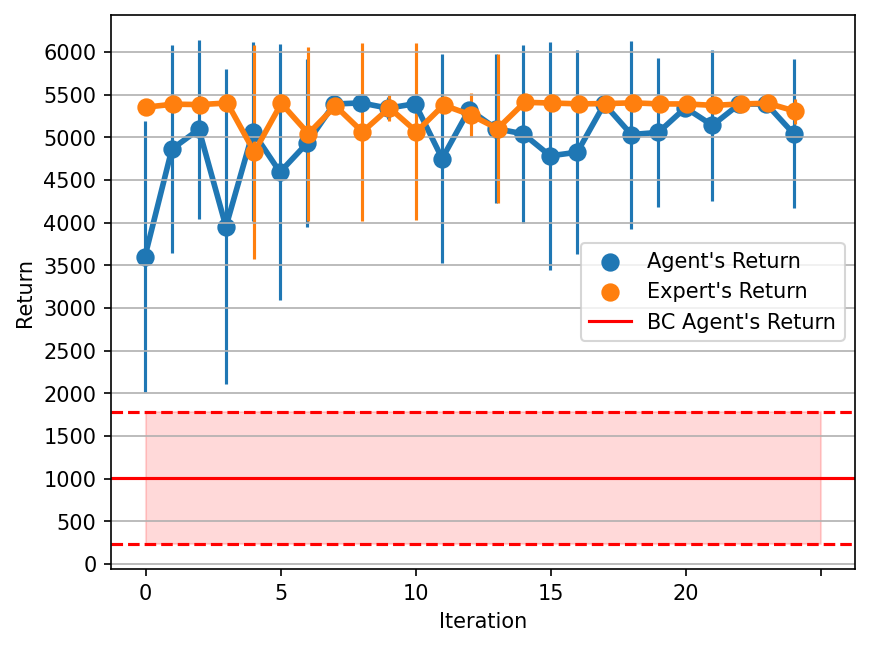

In [44]:
melted_df = pd.melt(df, id_vars=['Iteration'], var_name='kind')

melted_df = melted_df[melted_df['kind'].isin(['Eval_AverageReturn', 'Expert_AverageReturn'])]

melted_df['kind'] = melted_df['kind'].str.replace('Eval_AverageReturn', 'Agent\'s Return')
melted_df['kind'] = melted_df['kind'].str.replace('Expert_AverageReturn', 'Expert\'s Return')

ax = sns.pointplot(x='Iteration', y='value', hue='kind',
    data=melted_df, dodge=True, join=True, ci=None)
# plt.legend()
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax.collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)


# # Calculate the type of error to plot as the error bars
# # Make sure the order is the same as the points were looped over
errors = df['Eval_StdReturn'].values
ax.errorbar(x_coords[:len(x_coords) // 2], y_coords[:len(x_coords) // 2], yerr=errors, fmt=' ', zorder=-1)

errors = df['Expert_StdReturn'].values
ax.errorbar(x_coords[len(x_coords) // 2:], y_coords[len(x_coords) // 2:], yerr=errors, fmt=' ', zorder=-1)
plt.grid(axis='y')
plt.ylabel('Return')
mean = 1010.98388671875
std = 773.9197998046875
plt.axhline(y=mean + std, color='r', linestyle='--')
plt.axhline(y=mean - std, color='r', linestyle='--')
plt.axhline(y=mean, color='r', linestyle='-', label='BC Agent\'s Return')
ax.fill_between(x=np.arange(0, len(df) + 1), y1=mean - std, y2=mean + std, alpha=0.15, color='r')
plt.legend(loc='right')
plt.xticks(np.arange(0, len(df) + 1, len(df) // 5))
plt.yticks(np.arange(0, 6001, 500))
ax

/tmp/ipykernel_3614295/2516209956.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.pointplot(x='Iteration', y='Agent_Accuracy',


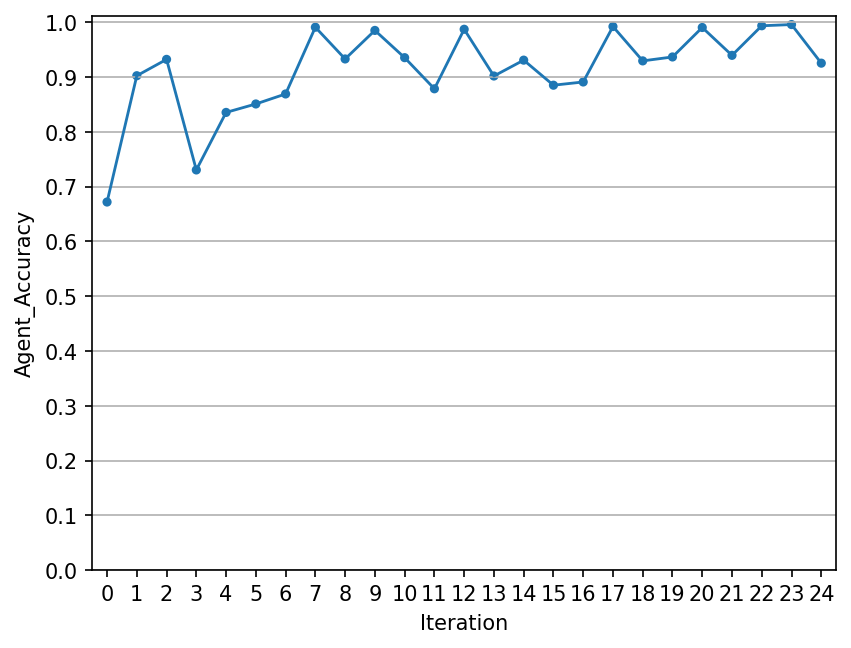

In [47]:
ax = sns.pointplot(x='Iteration', y='Agent_Accuracy', 
    data=df, dodge=True, join=True, ci=None, scale=0.5)

plt.xticks(np.arange(0, len(df), 1))
plt.yticks(np.arange(0., 1.1, 0.1))
plt.grid(axis='y')
# plt.show()

/tmp/ipykernel_3614295/2452481343.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.pointplot(x='Iteration', y='Training Loss',


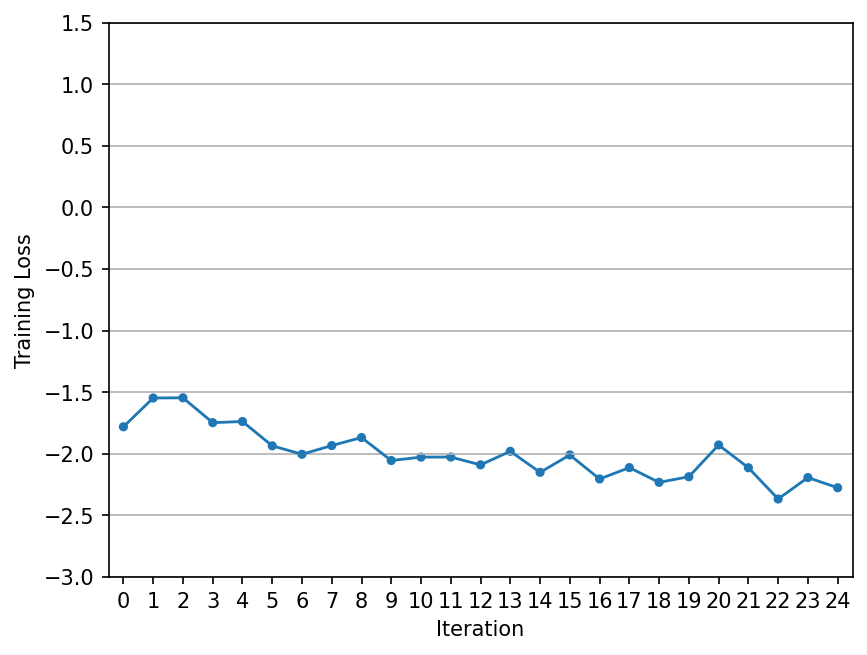

In [50]:
ax = sns.pointplot(x='Iteration', y='Training Loss', 
    data=df, dodge=True, join=True, ci=None, scale=0.5)

plt.xticks(np.arange(0, len(df), 1))
plt.yticks(np.arange(1.5, -3.5, -0.5))
plt.grid(axis='y')
plt.show()